In [1]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import random
import math
import warnings
import utils
from utils import *
from utils2 import *
import scipy.stats
from dataDictionariesLexicons import *
from testData import *
from polesConstructs import *

random.seed(1)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore')

sys.path.insert(0, '../') # necessary in order to import word2vecTraining where the epoch saver class, which is part of the model, is located

In [2]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
# modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300.bin')
# model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 
modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300LowerCase.bin')
model1 = KeyedVectors.load(modelFilePath) 

In [3]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.6B.300d.txt.word2vec.bin')
model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 

In [4]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.twitter.27B.200d.txt.word2vec.bin')
model3 = KeyedVectors.load(modelFilePath) 

In [5]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.42B.300d.txt.word2vec.bin')
model4 = KeyedVectors.load(modelFilePath) 

In [6]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.840B.300d.txt.word2vec.bin')
model5 = KeyedVectors.load(modelFilePath) 

In [7]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-common-crawl-300d-2M-subword.bin')
model6 = KeyedVectors.load(modelFilePath)

In [8]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-wiki-news-300d-1M-subword-Original.bin')
model7 = KeyedVectors.load(modelFilePath)

## Choose model

In [9]:
model = model1
# model = model2
# model = model3
# model = model4
# model = model5
# model = model6
# model = model7

## Plot several axes

Death & Life
Disease & Health
Dictatorship & Democracy
Malevolent & Respectable Figures


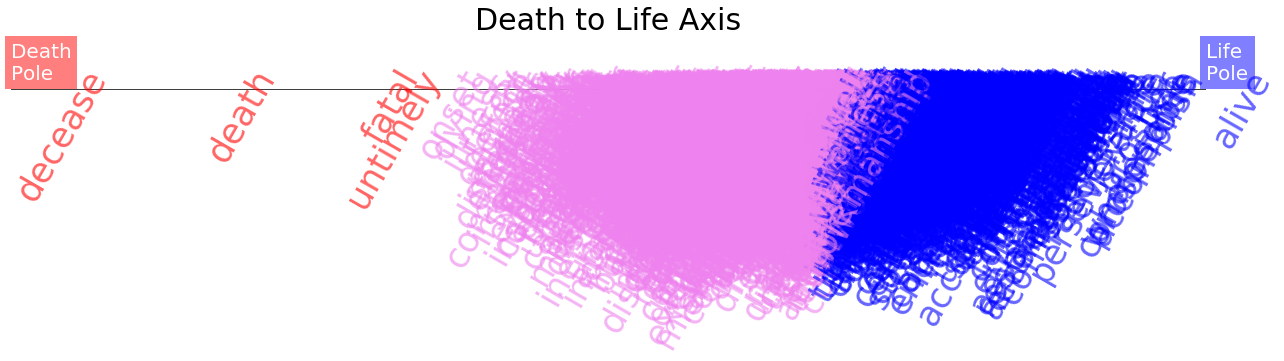

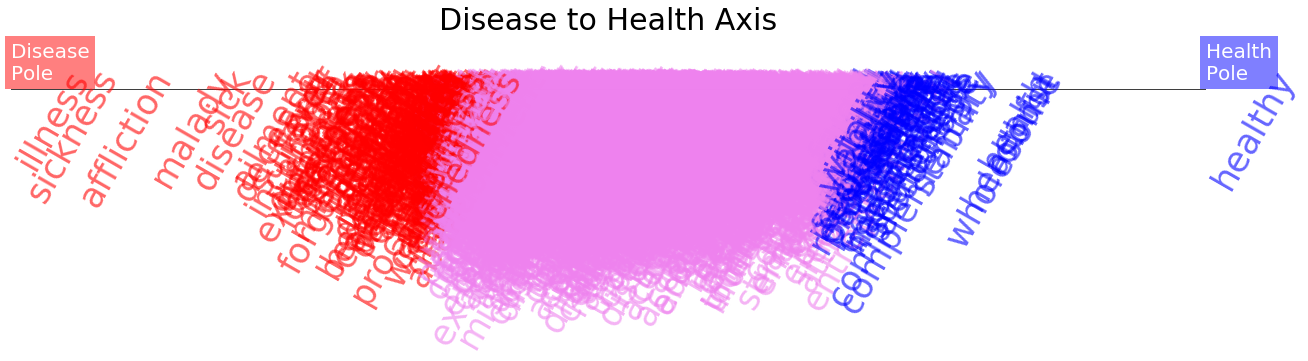

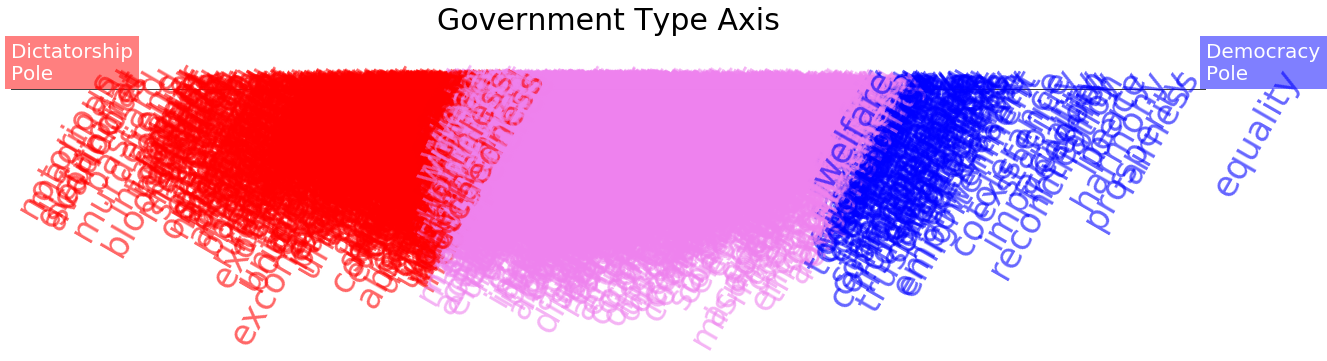

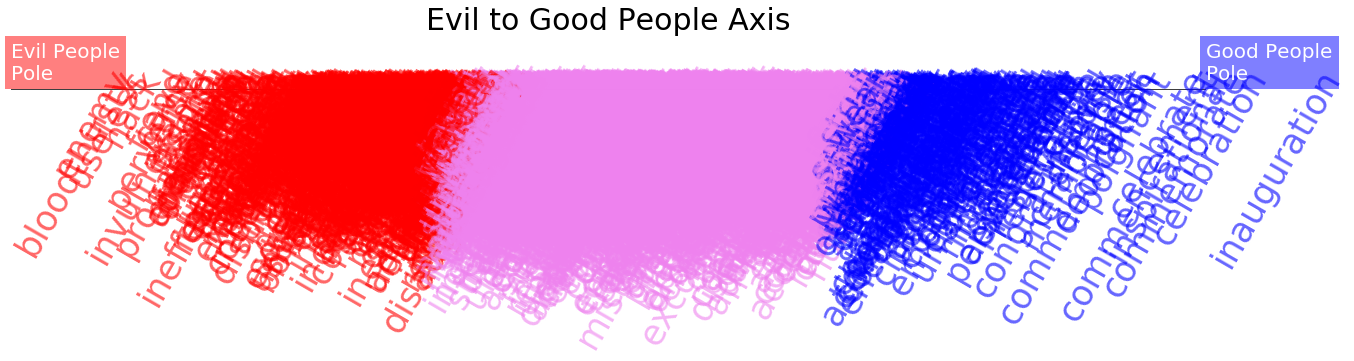

In [36]:
dataDictKeys = ['0-6','0-7','0-8','0-9']
poleNames = [('Death\nPole','Life\nPole'),('Disease\nPole','Health\nPole'),
             ('Dictatorship\nPole','Democracy\nPole'),('Evil People\nPole','Good People\nPole'),
            
            ]
AxisNames = ['Death to Life Axis','Disease to Health Axis','Government Type Axis','Evil to Good People Axis']
dataFrames = {}
# dataDictKey = '0-2'
for keyIndex, dataDictKey in enumerate(dataDictKeys):
    name = dataDict[dataDictKey]['name']
    constructPole1 = dataDict[dataDictKey]['constructPole1']
    constructPole2 = dataDict[dataDictKey]['constructPole2']
    constructPole1 = list(map(str.lower,constructPole1))
    constructPole2 = list(map(str.lower,constructPole2))
    
#     RealDataTemp = dataDict[dataDictKey]['RealDataLexicons'][1] #WEAT
    RealDataTemp = dataDict[dataDictKey]['RealDataLexicons'][0] #HGI
    print(name)
    constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,printFlag=False)# Filter out terms not in model vocabulary

    RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)
    Axis = dimensionN(model, constructPole1,constructPole2)  
    AxisName='Axis'
    try:
        dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
    except:
        pass
    dataFrame['RealValues']=RealData.values()
    dataFrame['AxisInRadians']=[math.acos(value) for value in dataFrame['Axis'].tolist()]# Transform cosine  similarities into angle radians (interval variable)
    dataFrame['Name']=dataFrame.index ###   index column into its own name column
    spearmanCorr,pearsonCorr=calculateCorrelations(dataFrame,printFlag=False)    
    dataFrames[dataDictKey]=dataFrame
    fig = plt.figure(figsize = (150,0.1))
    ax1 = fig.add_subplot(161)
    PlotDimensionH(ax1, dataFrame, AxisName,constructPole1,constructPole2,fontSize=35,pole1Name=poleNames[keyIndex][0],pole2Name=poleNames[keyIndex][1],title=AxisNames[keyIndex])    

dataFrame1 = dataFrames['0-6']
dataFrame2 = dataFrames['0-7']
dataFrame3 = dataFrames['0-8']
dataFrame4 = dataFrames['0-9']

## Switching into R

In [37]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [38]:
%%R 

#install.packages("car");install.packages("pastecs");install.packages("psych");
# install.packages("cowplot")

library(cowplot);library(car); library(ggplot2); library(pastecs); library(psych); library(gridExtra); library(MASS);library(Hmisc)

In [39]:
%%R -i dataFrame1 -i dataFrame2 -i dataFrame2 -i dataFrame3 -i dataFrame4  

Axis1 = dataFrame1$Axis
RealValues1 = dataFrame1$RealValues

Axis2 = dataFrame2$Axis
RealValues2 = dataFrame2$RealValues

Axis3 = dataFrame3$Axis
RealValues3 = dataFrame3$RealValues

Axis4 = dataFrame4$Axis
RealValues4 = dataFrame4$RealValues

## Correlations

In [40]:
%%R -o correlationPearson1 -o correlationSpearman1 -o correlationPvalue1 -o correlationTest1 -o correlationPearson2 -o correlationSpearman2 -o correlationPvalue2 -o correlationTest2 -o correlationPearson3 -o correlationSpearman3 -o correlationPvalue3 -o correlationTest3 -o correlationPearson4 -o correlationSpearman4 -o correlationPvalue4 -o correlationTest4 

# single correlation between a pair of variables
correlationPearson1 <- cor(Axis1,RealValues1,use="complete.obs",method="pearson")
correlationSpearman1 <- cor(Axis1,RealValues1,use="complete.obs",method="spearman")
correlationPvalue1 <- rcorr(Axis1,RealValues1,type="spearman")
# alternative = “less” and alternative = “greater”, alternative = "two.sided" respectively.
correlationTest1 <- cor.test(Axis1,RealValues1, alternative = "two.sided", method = "spearman", conf.level = 0.95, na.action = "na.fail")

correlationPearson2 <- cor(Axis2,RealValues2,use="complete.obs",method="pearson")
correlationSpearman2 <- cor(Axis2,RealValues2,use="complete.obs",method="spearman")
correlationPvalue2 <- rcorr(Axis2,RealValues2,type="spearman")
correlationTest2 <- cor.test(Axis2,RealValues2, alternative = "two.sided", method = "spearman", conf.level = 0.95)

correlationPearson3 <- cor(Axis3,RealValues3,use="complete.obs",method="pearson")
correlationSpearman3 <- cor(Axis3,RealValues3,use="complete.obs",method="spearman")
correlationPvalue3 <- rcorr(Axis3,RealValues3,type="spearman")
correlationTest3 <- cor.test(Axis3,RealValues3, alternative = "two.sided", method = "spearman", conf.level = 0.95)

correlationPearson4 <- cor(Axis4,RealValues4,use="complete.obs",method="pearson")
correlationSpearman4 <- cor(Axis4,RealValues4,use="complete.obs",method="spearman")
correlationPvalue4 <- rcorr(Axis4,RealValues4,type="spearman")
correlationTest4 <- cor.test(Axis4,RealValues4, alternative = "two.sided", method = "spearman", conf.level = 0.95)

In [41]:
correlationTest1

R object with classes: ('htest',) mapped to:
<ListVector - Python:0x000001CCA12A6888 / R:0x000001CF175F0FF8>
[Flo..., RNU..., Flo..., Flo..., Flo..., Str..., Str..., Str...]
  statistic: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001CD3154EE08 / R:0x000001CF188880F0>
[4028437497.880019]
  parameter: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  p.value: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001CD3154E3C8 / R:0x000001CF188A1558>
[0.000000]
  estimate: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001CD3154EC88 / R:0x000001CF18888208>
[0.484521]
  null.value: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001CD3154E308 / R:0x000001CF188700F0>
[0.000000]
  alternative: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001CD3154E248 / R:0x000001CF18818B40>
['two.sided']
  method: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001CD3154E1C8 / R:0x000001CF0D4AB850>
["Spearman's rank correlation rho"]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001CD3154E348 / R:0x000001CF188181A0>
['Axis1 and RealValues1']

In [42]:
print("Pearson correlation: ", correlationPearson1)
print("Spearman correlation: ",correlationSpearman1)
# print(correlationPvalue)
# print(correlationTest4)

Pearson correlation:  [1] 0.4773331

Spearman correlation:  [1] 0.4845213



## Plot

In [43]:
import utils
decimals=2

# correlationTestDictionary=dict(zip(correlationTest1.names, map(list,list(correlationTest1))))
# p=pValueAdjustment(correlationTestDictionary['p.value'][0])
#plotLabel1 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)
p=pValueAdjustment(correlationTest1[2][0])
plotLabel1 = "r=" + str(truncate(correlationTest1[3][0],decimals)) + ", " + str(p)

# correlationTestDictionary=dict(zip(correlationTest2.names, map(list,list(correlationTest2))))
# p=pValueAdjustment(correlationTestDictionary['p.value'][0])
# plotLabel2 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)
p=pValueAdjustment(correlationTest2[2][0])
plotLabel2 = "r=" + str(truncate(correlationTest2[3][0],decimals)) + ", " + str(p)

# correlationTestDictionary=dict(zip(correlationTest3.names, map(list,list(correlationTest3))))
# p=pValueAdjustment(correlationTestDictionary['p.value'][0])
# plotLabel3 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)
p=pValueAdjustment(correlationTest3[2][0])
plotLabel3 = "r=" + str(truncate(correlationTest3[3][0],decimals)) + ", " + str(p)

# correlationTestDictionary=dict(zip(correlationTest4.names, map(list,list(correlationTest4))))
# p=pValueAdjustment(correlationTestDictionary['p.value'][0])
# plotLabel4 = "r=" + str(truncate(correlationTestDictionary['estimate'][0],decimals)) + ", " + str(p)
p=pValueAdjustment(correlationTest4[2][0])
plotLabel4 = "r=" + str(truncate(correlationTest4[3][0],decimals)) + ", " + str(p)

In [44]:
dataFrame1

,Axis,RealValues,AxisInRadians,Name
abandon,0.000084,-1,1.570712,abandon
abandonment,-0.133723,-1,1.704921,abandonment
abate,-0.049854,-1,1.620671,abate
abdicate,-0.088838,-1,1.659751,abdicate
abhor,-0.042895,-1,1.613704,abhor
abide,0.122248,1,1.448242,abide
abject,-0.048576,-1,1.619391,abject
able,0.173118,1,1.396801,able
abnormal,-0.178616,-1,1.750376,abnormal
abolish,-0.106238,-1,1.677235,abolish


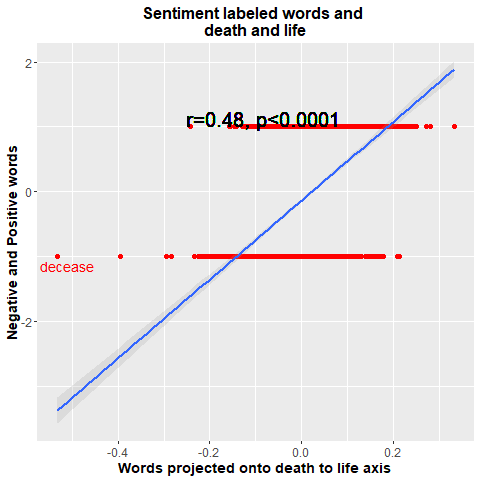

In [45]:
%%R -i plotLabel1 -i plotLabel2 -i plotLabel3 -i plotLabel4 
#install.packages("ggrepel")
# install.packages("MASS")
library(ggrepel)
library(MASS)


margin(t = 500, r = 0, b = 0, l = 1000, unit = "pt")

gt1<-ggplot(data=dataFrame1) + 
geom_point(aes(x=Axis1, y=RealValues1),shape=16,color='red',size=2,show.legend=FALSE)+
# geom_text_repel(aes(label=Name,x=Axis1, y=RealValues1),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame1, Axis1 > 0.4 | Axis1 < -0.45),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
# geom_text(data=subset(dataFrame1, Axis1 > 0.25 | RealValues < -1),aes(Axis,RealValues,label=Name))+
geom_text(aes(label=plotLabel1,x=-0.25, y=1),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Words projected onto death to life axis") +
ylab("Negative and Positive words")+
geom_smooth(aes(x=Axis, y=RealValues1),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
ggtitle("Sentiment labeled words and \ndeath and life")+
theme(axis.text=element_text(size=12),
     axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size = 16, face = "bold", hjust=0.5)) #+

gt1

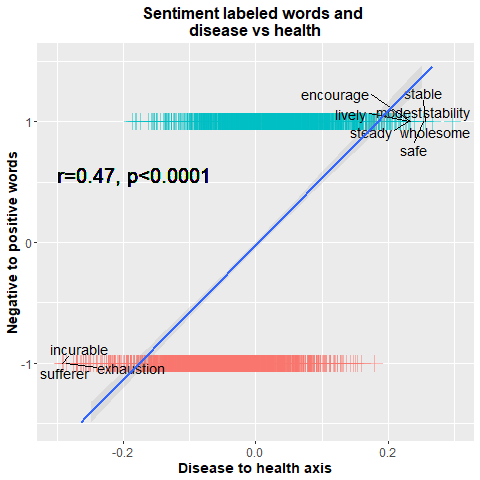

In [46]:
%%R -i plotLabel1 -i plotLabel2 -i plotLabel3 -i plotLabel4 
#install.packages("ggrepel")
# install.packages("MASS")
library(ggrepel)
library(MASS)

margin(t = 500, r = 500, b = 100, l = 1000, unit = "pt")


gt1<-ggplot(data=dataFrame1) + 
geom_point(aes(x=Axis1, y=RealValues1,colour=factor(RealValues1)),shape=3,size=5,show.legend=FALSE,alpha=0.5)+
# geom_text_repel(aes(label=Name,x=Axis1, y=RealValues1),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame1, Axis1 > 0.23 | Axis1 < -0.2),aes(label=Name,x=Axis, y=RealValues),color='black',size=5,show.legend=FALSE,vjust="inward",hjust="inward",force=3)+
# geom_text(data=subset(dataFrame1, Axis1 > 0.25 | RealValues < -1),aes(Axis,RealValues,label=Name))+
geom_text(aes(label=plotLabel1,x=-0.25, y=0.3),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Death to life axis") +
ylab("Negative to positive words")+
geom_smooth(aes(x=Axis, y=RealValues1),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
ggtitle("Sentiment labeled words and \nlife vs death")+
scale_x_continuous(limits = c(-0.3, 0.3)) +
scale_y_continuous(limits = c(-1.5, 1.5)) +
theme(axis.text=element_text(size=12),
     axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size = 16, face = "bold", hjust=0.5)) #+

gt2<-ggplot(data=dataFrame2) + 
geom_point(aes(x=Axis2, y=RealValues2,colour=factor(RealValues2)),shape=3,size=5,show.legend=FALSE,alpha=0.5)+
# geom_text_repel(data=subset(dataFrame2, RealValues > 60000 | RealValues < 1500),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame2, Axis2 > 0.23 | Axis2 < -0.28),aes(label=Name,x=Axis, y=RealValues),color='black',size=5,show.legend=FALSE,vjust="inward",hjust="inward",force=3)+
geom_text(aes(label=plotLabel2,x=-0.3, y=0.5),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Disease to health axis") +
ylab("Negative to positive words")+
geom_smooth(aes(x=Axis, y=RealValues2),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
ggtitle("Sentiment labeled words and \ndisease vs health")+
scale_x_continuous(limits = c(-0.3, 0.3)) +
scale_y_continuous(limits = c(-1.5, 1.5)) +
theme(axis.text=element_text(size=12),
     axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size = 16, face = "bold", hjust=0.5)) #+

gt3<-ggplot(data=dataFrame3) + 
geom_point(aes(x=Axis3, y=RealValues3,colour=factor(RealValues3)),shape=3,size=5,show.legend=FALSE,alpha=0.5)+
# geom_text_repel(data=subset(dataFrame2, RealValues > 60000 | RealValues < 1500),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame3, Axis3 > 0.25 | Axis3 < -0.22),aes(label=Name,x=Axis, y=RealValues),color='black',size=5,show.legend=FALSE,vjust="inward",hjust="inward",force=3)+
geom_text(aes(label=plotLabel3,x=-0.25, y=0.25),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Dictatorship to democracy axis") +
ylab("Negative to positive words")+
geom_smooth(aes(x=Axis3, y=RealValues3),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
ggtitle("Sentiment labeled words and \ngovernment type")+
scale_x_continuous(limits = c(-0.3, 0.3)) +
scale_y_continuous(limits = c(-1.5, 1.5)) +
theme(axis.text=element_text(size=12),
     axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size = 16, face = "bold", hjust=0.5)) #+

gt4<-ggplot(data=dataFrame4) + 
geom_point(aes(x=Axis4, y=RealValues4,colour=factor(RealValues4)),shape=3,size=5,show.legend=FALSE,alpha=0.5)+
# geom_text_repel(data=subset(dataFrame2, RealValues > 60000 | RealValues < 1500),aes(label=Name,x=Axis, y=RealValues),color='red',size=5,show.legend=FALSE,vjust="inward",hjust="inward")+
geom_text_repel(data=subset(dataFrame4, Axis4 > 0.22 | Axis4 < -0.21),aes(label=Name,x=Axis, y=RealValues),color='black',size=5,show.legend=FALSE,vjust="inward",hjust="inward",force=3)+
geom_text(aes(label=plotLabel4,x=-0.3, y=0.5),family = "TT Arial",color='black',size=7,hjust=0, vjust=0) +
xlab("Malevolent to respectful historical figures axis") +
ylab("Negative to positive words")+
geom_smooth(aes(x=Axis4, y=RealValues4),method="lm",alpha=0.2)+ #method="rlm" for robustness against outliers (library MASS required)
ggtitle("Sentiment labeled words and \nhistorical figures")+
scale_x_continuous(limits = c(-0.3, 0.3)) +
scale_y_continuous(limits = c(-1.5, 1.5)) +
theme(axis.text=element_text(size=12),
     axis.title=element_text(size=14,face="bold"),
    plot.title = element_text(size = 16, face = "bold", hjust=0.5)) #+

gt2

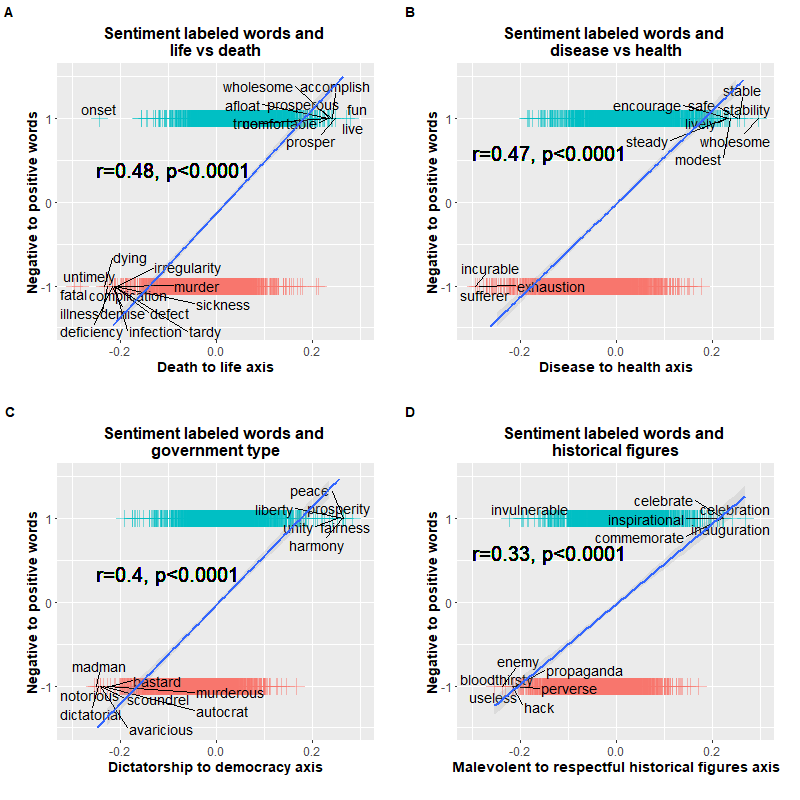

In [47]:
%%R -w 800 -h 800 -u px

theme_set(theme_gray())  # switch to default ggplot2 theme for good

title <- ggdraw() + draw_label("MPG declines with displacement and horsepower", fontface='bold')


plot_grid(gt1, gt2, gt3, gt4, align='h', labels=c('A', 'B', 'C', 'D'), #hjust =0, vjust = 0,
         scale = c(0.9, 0.9, 0.9, 0.9)
#          ncol=2,nrow=2
         )#Requires library cowplot

# ggsave("../../paper/figures/4correlations.png",dpi=300)

In [49]:
%%R -w 800 -h 800 -u px
ggsave("../../paper/figures/correlationsSentimentLexicons.png",dpi=300)